# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 607
['ballina', 'ilhabela', 'blackmans bay', 'shimoda', 'puerto natales', 'ain sukhna', 'bangassou', 'talnakh', 'iqaluit', 'fort bragg', 'knyaze-volkonskoye', 'sira', 'margaret river', 'polyarnyy', 'ushuaia', 'utena', 'quepos', 'kukuna', 'ta`u', 'georgetown', 'kuytun', 'albany', 'alice springs', 'turaif', 'kribi', 'xining', 'inirida', 'grytviken', 'port douglas', 'nanakuli', 'cascais', 'yellowknife', 'mili', 'waitangi', "ivdel'", 'codrington', 'puerto san carlos', 'mstera', 'umm kaddadah', 'bethel', 'kailua-kona', 'olonkinbyen', 'stanley', 'puerto ayora', 'kotlas', 'yurimaguas', 'dundaga', 'jamestown', 'udachny', 'ust-nera', 'rawson', 'flying fish cove', 'el granada', 'port-aux-francais', 'kodiak', 'adamstown', 'sitka', 'howrah', 'bengkulu', 'corinto', 'itaituba', 'mahaddayweyne', 'kongwa', 'tavda', 'kruisfontein', 'jarabulus', 'panacan', 'coquimbo', 'fortuna', 'papatowai', 'pamandzi', 'ilulissat', 'lihue', 'brazzaville', 'labrador city', 'soio', 'arteche'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
   
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
       # print(city_weather)
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
      

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ballina
Processing Record 2 of Set 1 | ilhabela
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | shimoda
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | ain sukhna
Processing Record 7 of Set 1 | bangassou
Processing Record 8 of Set 1 | talnakh
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | fort bragg
Processing Record 11 of Set 1 | knyaze-volkonskoye
Processing Record 12 of Set 1 | sira
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | polyarnyy
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | utena
Processing Record 17 of Set 1 | quepos
Processing Record 18 of Set 1 | kukuna
Processing Record 19 of Set 1 | ta`u
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | kuytun
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1 | alic

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ballina,-28.8667,153.5667,18.68,82,0,7.46,AU,1697125066
1,ilhabela,-23.7781,-45.3581,26.57,77,64,2.18,BR,1697125066
2,blackmans bay,-43.0167,147.3167,10.07,81,99,2.34,AU,1697125066
3,shimoda,34.6667,138.9500,16.72,75,11,4.07,JP,1697125066
4,puerto natales,-51.7236,-72.4875,6.91,86,75,4.33,CL,1697125066


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ballina,-28.8667,153.5667,18.68,82,0,7.46,AU,1697125066
1,ilhabela,-23.7781,-45.3581,26.57,77,64,2.18,BR,1697125066
2,blackmans bay,-43.0167,147.3167,10.07,81,99,2.34,AU,1697125066
3,shimoda,34.6667,138.9500,16.72,75,11,4.07,JP,1697125066
4,puerto natales,-51.7236,-72.4875,6.91,86,75,4.33,CL,1697125066


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

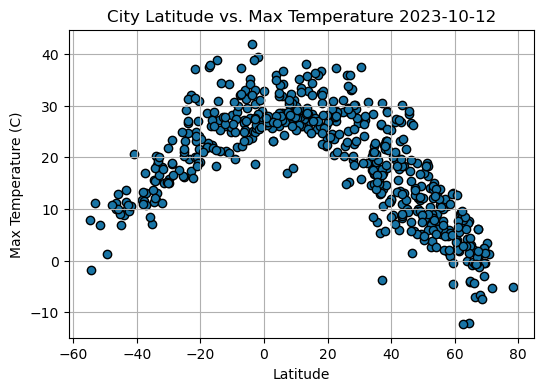

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(6,4))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o" ,c='#1874a5',edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature {date.today()}")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()






#### Latitude Vs. Humidity

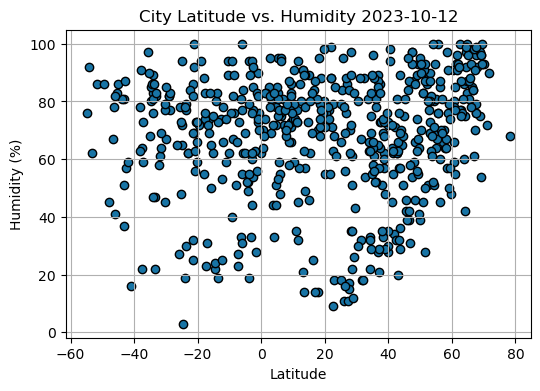

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(6,4))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o" ,c='#1874a5',edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity {date.today()}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

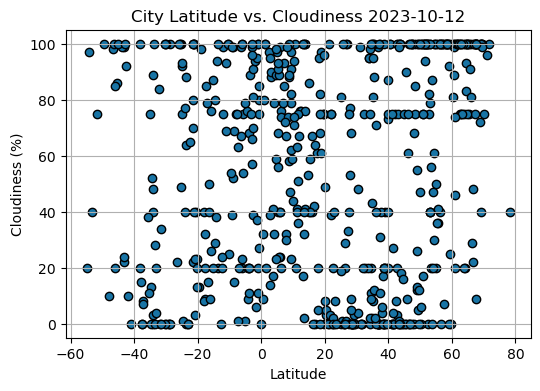

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(6,4))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o" ,c='#1874a5',edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness {date.today()}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

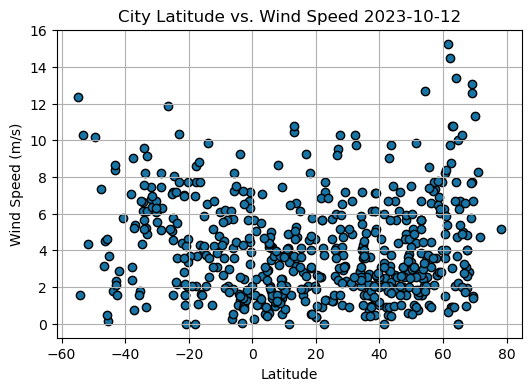

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(6,4))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o" ,c='#1874a5',edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed {date.today()}")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
# Perform a linear regression on temperature vs. latitude
#function to call is "linearRegression"
#variables are
# x_values: first set of data
# y_values: second set of data
# regEQplotX: where the linear regression equasion appears on the plot x line
# regEQplotY: where the linear regression equasion appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)


def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
  (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # Get regression values
  regress_values = x_values * slope + intercept

  # Create line equation string
  line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

  # Create scatter and line plot  
  plt.scatter(x_values,y_values)
  plt.plot(x_values,regress_values,"r-")  

  #r-squared value
  print("Correlation Coefficient (r-value):" ,rvalue)
  print(f"The r-squared is: {rvalue**2}")

  # Label plot and annotate the line equation
  plt.annotate(line_eq,(regEQplotX,regEQplotY), fontsize=11, color="red")
  plt.xlabel('Latitude')
  plt.ylabel(f'{y_label}')
  plt.grid()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,shimoda,34.6667,138.9500,16.72,75,11,4.07,JP,1697125066
5,ain sukhna,29.6002,32.3167,26.63,43,0,2.32,EG,1697125066
6,bangassou,4.7413,22.8184,26.28,78,59,0.79,CF,1697125067
7,talnakh,69.4865,88.3972,-0.44,93,100,1.53,RU,1697125067
8,iqaluit,63.7506,-68.5145,-0.15,86,75,2.06,CA,1697125067


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df =city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ballina,-28.8667,153.5667,18.68,82,0,7.46,AU,1697125066
1,ilhabela,-23.7781,-45.3581,26.57,77,64,2.18,BR,1697125066
2,blackmans bay,-43.0167,147.3167,10.07,81,99,2.34,AU,1697125066
4,puerto natales,-51.7236,-72.4875,6.91,86,75,4.33,CL,1697125066
12,margaret river,-33.9500,115.0667,11.80,89,0,5.64,AU,1697125067


###  Temperature vs. Latitude Linear Regression Plot

Correlation Coefficient (r-value): -0.8536412535831224
The r-squared is: 0.7287033898189647


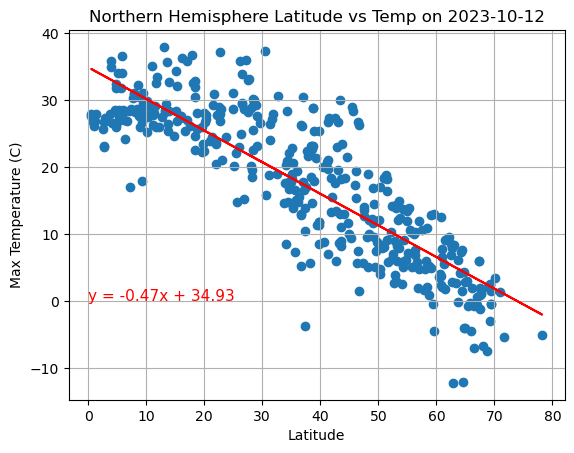

In [23]:
# Linear regression on Northern Hemisphere
#set the data sets to compare
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 0
#label the y axis
y_label = "Max Temperature (C)"

#give the title
plt.title(f'Northern Hemisphere Latitude vs Temp on {date.today()}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig(f'output_data/Northern Hemisphere Latitude vs Temp on {date.today()}.png')
plt.show()

Correlation Coefficient (r-value): 0.1529383126859998
The r-squared is: 0.02339012748724065


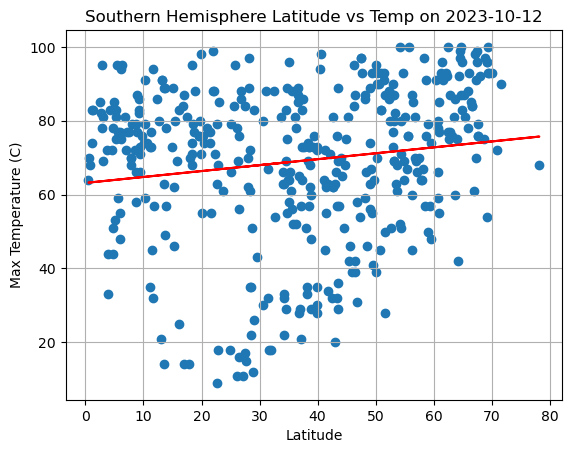

In [31]:
# Linear regression on Southern Hemisphere

#set the data sets to compare
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#tweak where the equation appears on the plot
regEQplotX = -50
regEQplotY = 35
#label the y axis
y_label = "Max Temperature (C)"

#give the title
plt.title(f'Southern Hemisphere Latitude vs Temp on {date.today()}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig(f'output_data/Southern Hemisphere Latitude vs Temp on {date.today()}.png')
plt.show()

**Discussion about the linear relationship:** 

***North/South Latitude vs TEMPERATURE Linear Regression Insights***

The scatter plot maps Northern and Southern cities' temperature against their latitude. Cities selected randomly.
Result reveals a strong correlation between distance from the equator temperature. The closer to the equator, the higher the temperature.
Northern Hemisphere cities show a strong negative correlation between latitude and temperature with a correlation coefficient of -0.8536412535831224.As the latitude increases the temperature decreases. 

Southern Hemisphere cities show a weak postive correlation between latitude and temperature with a correlation coefficient of 0.1529383126859998.As the latitude decreases the temperature increases. 

### Humidity vs. Latitude Linear Regression Plot

Correlation Coefficient (r-value): 0.1529383126859998
The r-squared is: 0.02339012748724065


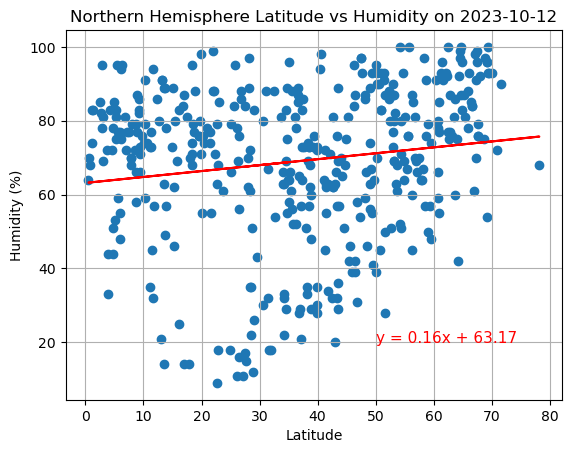

In [32]:
# Northern Hemisphere
#set the data sets to compare
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#tweak where the equation appears on the plot
regEQplotX = 50
regEQplotY = 20
#label the y axis
y_label = "Humidity (%)"

#give the title
plt.title(f'Northern Hemisphere Latitude vs Humidity on {date.today()}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig(f'output_data/Northern Hemisphere Latitude vs Humidity on {date.today()}.png')
plt.show()

Correlation Coefficient (r-value): -0.07388002463494117
The r-squared is: 0.005458258040059514


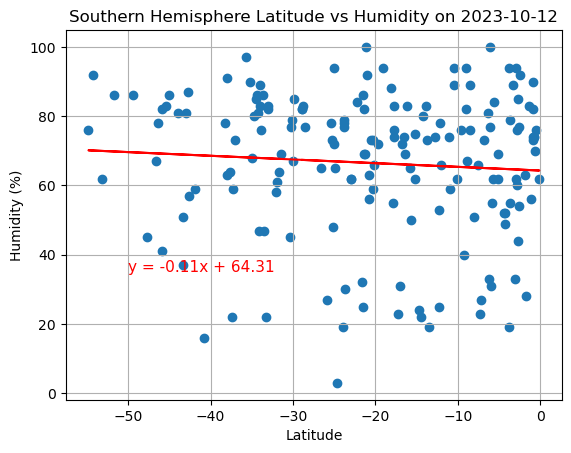

In [33]:
# Southern Hemisphere
#set the data sets to compare
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#tweak where the equation appears on the plot
regEQplotX = -50
regEQplotY = 35
#label the y axis
y_label = "Humidity (%)"

#give the title
plt.title(f'Southern Hemisphere Latitude vs Humidity on {date.today()}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig(f'output_data/Southern Hemisphere Latitude vs Humidity on {date.today()}.png')
plt.show()

**Discussion about the linear relationship:** 

***North/South Latitude vs HUMIDITY Linear Regression Insights***

The scatter plot maps Northern and Southern cities' humidity against their latitude. Cities selected randomly.

Northern Hemisphere cities show a weak positive correlation between humidity and temperature with a correlation coefficient of 0.1529383126859998.

Southern Hemisphere cities show a weak negative correlation between humidity and temperature with a correlation coefficient of -0.07388002463494117.


### Cloudiness vs. Latitude Linear Regression Plot

Correlation Coefficient (r-value): 0.1782710377102286
The r-squared is: 0.03178056288628175


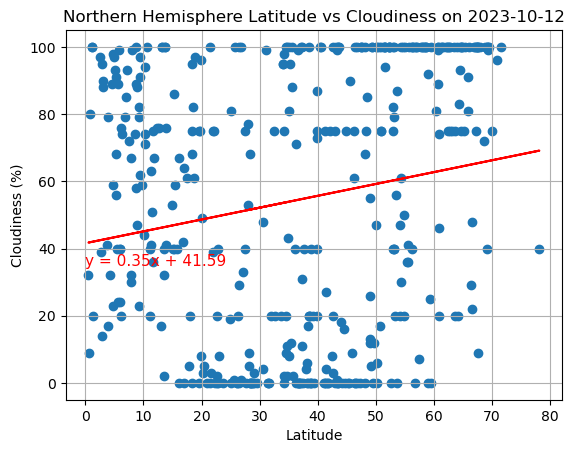

In [34]:
# Northern Hemisphere
#set the data sets to compare
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 35
#label the y axis
y_label = "Cloudiness (%)"

#give the title
plt.title(f'Northern Hemisphere Latitude vs Cloudiness on {date.today()}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig(f'output_data/Northern Hemisphere Latitude vs Cloudiness on {date.today()}.png')
plt.show()

Correlation Coefficient (r-value): 0.09154657701490135
The r-squared is: 0.008380775763145264


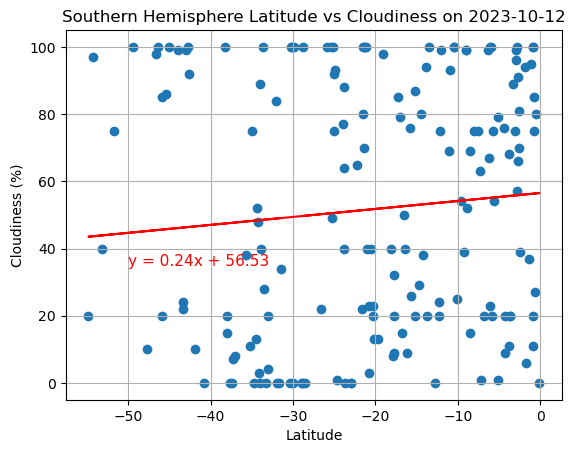

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#tweak where the equation appears on the plot
regEQplotX = -50
regEQplotY = 35
#label the y axis
y_label = "Cloudiness (%)"

#give the title
plt.title(f'Southern Hemisphere Latitude vs Cloudiness on {date.today()}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig(f'output_data/Southern Hemisphere Latitude vs Cloudiness on {date.today()}.png')
plt.show()

**Discussion about the linear relationship:**

***North/South Latitude vs cloudiness Linear Regression Insights***

The scatter plot maps Northern and Southern cities' cloudiness against their latitude. Cities selected randomly.

Northern Hemisphere cities show a weak positive correlation between cloudiness and temperature with a correlation coefficient of 0.1782710377102286.

Southern Hemisphere cities show a weak positive correlation between cloudiness and temperature with a correlation coefficient of 0.09154657701490135.

### Wind Speed vs. Latitude Linear Regression Plot

Correlation Coefficient (r-value): 0.23834230327372638
The r-squared is: 0.05680705352982496


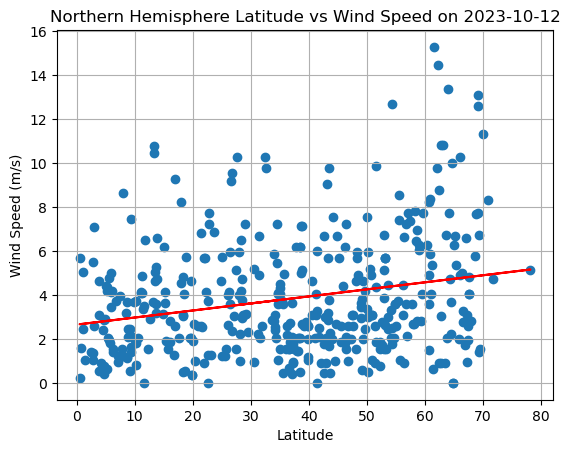

In [35]:
# Northern Hemisphere
#set the data sets to compare
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 20
#label the y axis
y_label = "Wind Speed (m/s)"

#give the title
plt.title(f'Northern Hemisphere Latitude vs Wind Speed on {date.today()}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig(f'output_data/Northern Hemisphere Latitude vs Wind Speed on {date.today()}.png')
plt.show()

Correlation Coefficient (r-value): -0.26119779935026666
The r-squared is: 0.06822429038542216


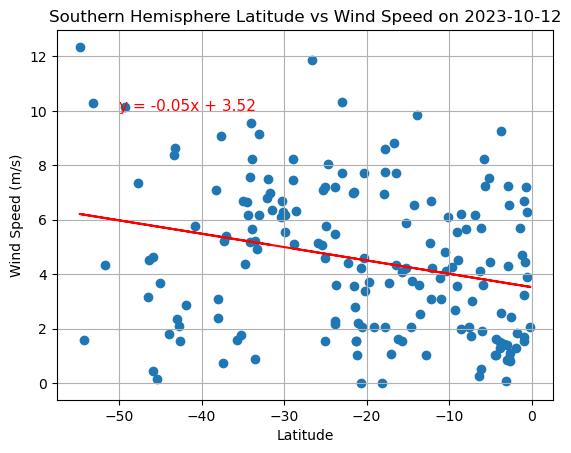

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#tweak where the equation appears on the plot
regEQplotX = -50
regEQplotY = 10
#label the y axis
y_label = "Wind Speed (m/s)"

#give the title
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {date.today()}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig(f'output_data/Southern Hemisphere Latitude vs Wind Speed on {date.today()}.png')
plt.show()

**Discussion about the linear relationship:** 

***North/South Latitude vs Wind Speed Linear Regression Insights***

The scatter plot maps Northern and Southern cities' Wind Speed against their latitude. Cities selected randomly.

Northern Hemisphere cities show a weak positive correlation between Wind Speed and temperature with a correlation coefficient of 0.23834230327372638.

Southern Hemisphere cities show a weak negative correlation between Wind Speed and temperature with a correlation coefficient of -0.06119779935026666.
